In [32]:
from sklearn import datasets #导入sklearn数据集
from sklearn.neighbors import KNeighborsClassifier # 分类

iris = datasets.load_iris() # 加载鸢尾花数据集
# print(iris.DESCR) # 输出数据集的信息，查看属性，数据集数量和种类
X=iris.data # 分离数据集的属性和标签，标签就是表明种类
Y=iris.target

print(X.shape) # 输出样本数量，属性数量
print(set(Y)) # 共3类

(150, 4)
{0, 1, 2}


ok
在测试集上准确率： 0.96
在交叉验证当中最好的结果： 0.9601715686274509
选择最好的模型是： KNeighborsClassifier(weights='distance')
准确率: 0.96


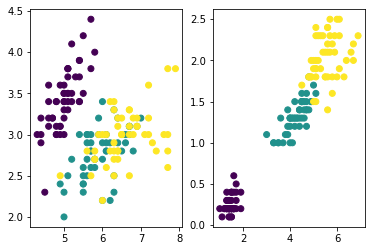

In [35]:
#分离数据集为训练集和测试集，用测试集判断准确率
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3)#2/3,100个训练，1/3，50个测试验证,每次结果不一样随机分类，

#导包标准化
from sklearn.preprocessing import StandardScaler
standardscaler=StandardScaler()
standardscaler.fit(X_train)
X_train=standardscaler.transform(X_train)
X_test=standardscaler.transform(X_test)
print('ok')
'''
#KNN模型参数选择，此处用for循环网格搜索
from sklearn.model_selection import cross_val_score
import numpy as np
#求最佳K值,cv分几份，score越接近于1越好,1-score越接近0越好,求uniform和distance哪个好
result={}
weights=['uniform','distance']
for k in range(1,15):#一个参考标准sqrt(150)==12
    for w in weights:
        knn = KNeighborsClassifier(n_neighbors=k, weights=w,)
        sm=cross_val_score(knn,X,Y,scoring='accuracy',cv=6).mean()#交叉验证cross_val_score选择最合适的参数，分类scoring='accuracy'评价指标
        result[w+str(k)]=sm
print(result)
print(list(result)[np.array(list(result.values())).argmax()])
'''
#导包网格搜索，搜索算法最合适的参数
from sklearn.model_selection import GridSearchCV#grid网格,search搜索
# 构造一些属性
params = {'n_neighbors':[i for i in range(1,15)],
          'weights':['uniform','distance'],
          'p':[1,2]}
# 进行网格搜索
knn=KNeighborsClassifier()
grid = GridSearchCV(knn, params,scoring='accuracy',cv=6)
grid.fit(X_train, Y_train)
# 预测准确率
print("在测试集上准确率：", grid.score(X_test, Y_test))
print("在交叉验证当中最好的结果：", grid.best_score_)
print("选择最好的模型是：", grid.best_estimator_)
#print("每个超参数每次交叉验证的结果：", gcv.cv_results_)

#knn算法流程
knn=grid.best_estimator_#最好的模型赋给knn
knn.fit(X_train,Y_train)#fit用于训练
Y_pred=knn.predict(X_test)#predict用于预测
'''
#预测结果展示
labels = ["setosa", "versicolor", "virginica"]
for i in range(len(Y_pred)):
    print("%d:  真实值:%s  预测值:%s" % ((i+1), labels[Y_test[i]],labels[Y_pred[i]]))
'''
print("准确率:",knn.score(X_test,Y_test))

#绘图，用matplotlib知识，博士比较手生，写的比较简单
import matplotlib.pyplot as plt
#四个属性，四维空间，降维，切片
plt.subplot(1, 2, 1)  # 添加子块，第一个图
# XX1=X[:,:2] # 前2列
# print(XX1)
plt.scatter(X[:,0],X[:,1],c=Y) # 绘制散点图，横坐标第1列，纵坐标第2列，散点颜色为label值分类
plt.subplot(1, 2, 2)  # 添加子块，第一个图
# XX2=X[:,2:] # 后2列
plt.scatter(X[:,2],X[:,3],c=Y) # 绘制散点图，横坐标第3列，纵坐标第4列
plt.show()